## Agenda:
- Today, we will discuss the introduction to other SOTA such as Inception net and Resnet.
- And also how to use pretrained model to create embeddings for finding similarity.


##Problem statement:

Suppose you are a DataScientist in PINInterest company and your task is to return similar images on a given query image

### What is image similarity?

- Image similarity is the measure of how similar two images are.

- In other words, it quantifies the degree of similarity between intensity patterns in two images.


- Finding Image similarity also called reverse image search



<img src = 'https://merlinone.com/wp-content/uploads/2019/08/Screen-Shot-2019-08-09-at-9.59.05-AM.jpg'>

### What can you do with image similarity?


- Let us start with a few use cases to give you some inspiration before we dig deeper into the technical details.

- The use cases are endless and you can use image similarity in many different areas.

- Explore large unlabeled digital image archives by display similar images. Examples :

**- Google Image Search:**

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEUIMr3FCbiob3tZAgcE5UTi0AymsXIzHgvA&usqp=CAU'>


Demo : https://images.google.com/


**- Pinterest**

<img src='https://miro.medium.com/max/1080/1*Mbvjp-iYtZEyaQit6oUwBA.jpeg' height=300>




**- Websites like "Celebrity like me"**

<img src='https://media1.popsugar-assets.com/files/thumbor/wy5gUl9fJ8aktIgyOVESS0ILTfc/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2016/04/08/755/n/1922507/7dc85d436018e491_01/i/Celebs-Like-Me-Website.jpg' height=300>


- **Clustering** items from an online retail shop.
Categories like the shoes are visually unique, while some categories have a fair amount of visual overlap with their neighbors.

<img src='https://images.prismic.io/peltarionv2/5f694b0b-4db7-4883-a56f-adccf09f119b_blog_fashion_clustering.png?auto=compress%2Cformat&rect=0%2C0%2C1625%2C1129&w=1980&h=1376' height=500 width=500>

**- Remove Duplicates**:

- High-quality training data is key for successful machine learning projects.
- Having duplicates in the training data can lead to bad results.
- Image Similarity can also be used to find duplicates in the datasets.



###How could we compute how similar one image is to another?

- For similarity among data in a vectorized form, we can find the sum of the squared differences between two examples, or use similar methods like euclidean or cosine similarity.
- However, performing such techniques on images — summing the squared difference between each pixel value — fails, since the information in images lie in the interaction between pixels.
- We would have to first extract the meaningful features out of the images into a vectorized form if we were to proceed.

####But how do we extract features out of unstructured data like images?


- To do so, we use learnable embeddings — feature vectors containing the meaning of particular image.

#### So What is an embedding ?

- Our computers cannot directly understand images or text the way we humans do. However, computers are good at understanding numbers!
- Thus, to help our computers understand the content of images or text, we need to convert them into a meaningful numeric representation.
- For example, if we consider the image use case, we are essentially “encoding” or “embedding” the context and scene of our image into a series of numbers in the form of a vector.

In simple terms, An “embedding” vector is a numeric representation of our image data so that our computers can understand the context and scene of our images.

<img src='https://assets.zilliz.com/embedding_a031609fb3.svg'>

#### How to get embeddings ?

- One way of buiding image similarity model is to extract features using traditional methods such as Gabor filters, SIFT , Local Binary Patterns, HOG  and then use these feature to compute the similarity between the features.

- The other most popular and common way is to use deep learning model to aid in identifying similar images for a query image.

- A CNN can be trained to map images to vectors, and we can use those vectors for findiing similar images.




<img src='https://www.researchgate.net/publication/328376369/figure/fig2/AS:683270429741059@1539915773531/Siamese-network-for-embedding-the-feature-maps-into-a-constant-vector.png'>

### How is image similarity different from image classification in CNN?


- It’s true that image similarity is closely related to image classification, if only because it uses the same classifier networks as processing workhorse.

- However, there are a couple of points that make image similarity its own thing:

  - Image similarity considers many dimensions
  - In an image classification problem, we are only concerned with figuring out whether or not an image belongs to one (or possibly several) discrete categories, which means that a lot of information is discarded from the final output.

  - By using the representation of the data before the final classification layer, more aspects of the data can be used.



### Feature Extraction Using pretrained CNN model:


We can take advantage of one of the many pre-trained deep learning models. They generalize well enough to fit most of the use cases.

- Uses the representations learned by a pretrained network to extract meaningful features.

- You do not need to (re)train the entire model.

- The base convolutional network already contains features that are generically useful for classifying pictures.

- We will extract features from pretrained model like   ResNet-50, InceptionV3 and benchmark them using the Caltech101 dataset.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/977/original/Screenshot_2023-09-08_at_11.42.18_AM.png?1694153573 width=800>

### Download the Caltech101 dataset.


#### Description:

- Caltech-101 consists of pictures of objects belonging to 101 classes, plus one background clutter class.
- Each image is labelled with a single object. Each class contains roughly 40 to 800 images, totalling around 9k images.
- Images are of variable sizes, with typical edge lengths of 200-300 pixels.
- This version contains image-level labels only. The original dataset also contains bounding boxes.




<img src='https://www.researchgate.net/profile/Divya-Srivastava-22/publication/328641918/figure/fig2/AS:941736666873879@1601538926485/3-Sample-images-of-each-10-categories-from-Caltech-101-Dataset.png' height=300 width=350>

```
$ gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output caltech101.tar.gz

$ tar -xvzf caltech101.tar.gz

$ mv 101_ObjectCategories datasets/caltech101
```
<!-- Note that there is a 102nd category called ‘BACKGROUND_Google’ consisting of random images not contained in the first 101 categories, which needs to be deleted before we start experimenting.  -->

```
$ rm -rf datasets/caltech101/BACKGROUND_Google
```

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/


/content/gdrive/My Drive/Colab Notebooks


In [ ]:
!mkdir -p data
!pip install gdown
!gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output data/caltech101.tar.gz
!tar -xvzf data/caltech101.tar.gz --directory data
!mv data/101_ObjectCategories data/caltech101
!rm -rf data/caltech101/BACKGROUND_Google

Streaming output truncated to the last 5000 lines.
101_ObjectCategories/chair/image_0005.jpg
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jpg
101_ObjectCategories/chai

### Importing Required libraries:

In [ ]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import random
import time
import math
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


### Which Cnn pretrained architecture to use ?

- Recall from previous class, drawbacks of vgg & alexnet?
 - It is painfully slow to train.
 - The network architecture weights themselves are quite large (in terms of disk/bandwidth) becuz of FC layers in the end.

####Can we have better than alexnet or vgg in terms of less parameters & better accuracy ?




### Introduction to Resnet & Inception Net:

- Before solving the problem , lets try to understand much deeper state of the art CNN architectures compared to Alexnet and Vgg with less number of parameters and performed well on imagenet dataset.





## Inception (GoogLeNet)

- The Inception architecture was named after Christopher Nolan’s 2010 movie Incep‐ tion, starring Leonardo DiCaprio.
- One line from the movie dialog—“We need to go deeper”—became an internet meme.
- Building deeper and deeper neural networks was one of the main motivations of researchers at that time.

<center><img src='https://i.kym-cdn.com/photos/images/original/000/384/176/d2f.jpg' height=250 width=300></center>

- Inception (GoogLeNet) won imagenet in 2014; As the name suggets, it was developed by google
  - The GoogLeNet architecture, introduced by Szegedy et al. in their 2014 paper, Going Deeper With Convolutions.
  - Original Paper:
     https://arxiv.org/pdf/1409.4842.pdf

#### Why this network is important?

- **This Network is important for two reasons:**

- First, the model architecture is tiny compared to AlexNet and VGGNet.
  - The authors are able to obtain such a dramatic drop in network architecture size (while still increasing the depth of the overall network) by removing fully-connected layers and instead using global average pooling.
  - Most of the weights in a CNN can be found in the dense FC layers –
    - if these layers can be removed, the memory savings are massive. <br>

| Model Name | Number of params | Top 1 Acc | Top 5 Acc
| --- | --- | --- | --- |
| Alexnet | 60M  | 63.3 | 84.6
| VGG16 | 138M   | 74.4| 91.9
| VGG19 | 144M   | 74.5| 92.0
| GoogleNet | 11.2M | 74.8 | 92.2


<br>

- Secondly, the Szegedy et al. paper makes usage of a **network in network or micro-architecture** when constructing the overall macro-architecture.
  - Up to this point, we have seen only sequential neural networks where the output of one network feeds directly into the next.
  - We are now going to see micro-architectures, small building blocks that are used inside the rest of the architecture,
    - where the output from one layer can split into a number of various paths and be rejoined later.
  - Specifically, Szegedy et al. contributed the Inception module to the deep learning community, a building block that fits into a Convolutional Neural Network enabling it to learn CONV layers with multiple filter sizes,
    - turning the module into a **multi-level feature extractor.**








### **But Why we need multi-level feature extractor ?**

 The general idea behind the multi-level feature extractor :


- It can be hard to decide the size of the filter you need to learn at a given CONV layers.

- Should they be 5 × 5 filters?
- What about 3 × 3 filters?
- Should we learn local features using 1 × 1 filters?
- Instead, why not learn them all and let the model decide?

  - Inside the Inception module, we learn all three 5 × 5, 3 × 3, and 1 × 1 filters (computing them in parallel) concatenating the resulting feature maps along the channel dimension.
  - The next layer in the GoogLeNet architecture (which could be another Inception module) receives these concatenated, mixed filters and performs the same process.
  - Taken as a whole, this process enables GoogLeNet to learn both local features via smaller convolutions and abstracted features with larger convolutions – we don’t have to sacrifice our level of abstraction at the expense of smaller features



For example,

In the below image.

<img src='https://qph.cf2.quoracdn.net/main-qimg-824c88b26a99dd8f053e2298b296dc36-pjlq' height=300 width=400 >

There are 3 main entities-

- Wheat
- Humans
- Sky

For Doing image similarity on above image:

  - Logically, it will be more comfortable for a neural network to use a high dimensional kernel for recognizing an entity that is present in a vast area and
  - a low dimensional kernel for an entity is present in a small area.

Inception can use a variety of kernels to recognize different entities in the image depending upon their importance and area in the frame.

Now that we’ve discussed the motivation behind the Inception module, lets look at the -

### Architecture:



Each inception module consists of four operations in parallel

- 1x1 CONV layer
- 3x3 CONV layer
- 5x5 CONV layer
- max pooling


<img src='https://qph.cf2.quoracdn.net/main-qimg-b4ffbeda08b20e4b1554e9f5e417281e'>

`An activation function (ReLU) is implicitly applied after every CONV layer. To save space, this activation function was not included in the network diagram above. When we implement GoogLeNet, you will see how this activation is used in the Inception module.`


Here,
- 5X5 CONV is used for capturing global features and
- 3X3 CONV is used for capturing small and distributed features.
- The 1x1 CONV is used for depth reduction.
- Max pooling layer is mainly used for finding the spatial invariance and also to capture very small entities

In [ ]:
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

<img src='https://miro.medium.com/max/1276/1*qVQbA9GYe5VKIQtAQWPM9w.jpeg'>


- The network is 22 layers deep when counting only layers with parameters (or 27 layers if we also count pooling).
- Please refer the link to see code of full model architecture:
https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

## Description of Architecture:

Specifically take note of how the Inception module branches into four distinct paths from the input layer.

- The first branch in the Inception module simply learns a series of 1 × 1 local features from the input.
- The second batch first applies 1 × 1 convolution, not only as a form of learning local features, but instead as dimensionality reduction.
   - Larger convolutions (i.e., 3 × 3 and 5 × 5) by definition take more computation to perform.
   - Therefore, if we can reduce the dimensionality of the inputs to these larger filters by applying 1 × 1 convolutions, we can reduce the amount of computation required by our network while introducing non-linearity..
   - Therefore, the number of filters learned in the 1 × 1 CONV in the second branch will always be smaller than the number of 3 × 3 filters learned directly afterward.
- The third branch applies the same logic as the second branch, only this time with the goal of learning 5 × 5 filters.
  - We once again reduce dimensionality via 1 × 1 convolutions, then feed the output into the 5 × 5 filters.

- The fourth and final branch of the Inception module performs 3 × 3 max pooling with a stride of 1 × 1 – this branch is commonly referred to as the pool projection branch.
  - Historically, models that perform pooling have demonstrated an ability to obtain higher accuracy, although Later through the work of Springenberg et al. in their 2014 paper, Striving for Simplicity:
     - The All Convolutional Net  mention that this isn’t necessarily true, and that POOL layers can be replaced with CONV layers for reducing volume size.
  - In the case of Szegedy et al., this POOL layer was added simply due to the fact that it was thought that they were needed for CNNs to perform reasonably.
  - The output of the POOL is then fed into another series of 1 × 1 convolutions to learn local features.

- Finally, all four branches of the Inception module converge where they are concatenated together along the channel dimension.
- Special care is taken during the implementation (via zero padding) to ensure the output of each branch has the same volume size, thereby allowing the outputs to be concatenated.
-The output of the Inception module is then fed into the next layer in the network.
- In practice, we often stack multiple Inception modules on top of each other before performing a pooling operation to reduce volume size.




###  **What are 1x1 convolutions & how are they worked to reduce dimensions ?**


- Sliding a single-pixel filter across an image sounds silly.
- It’s like multiplying the image by a constant.
- So why would they use it in the network?
- The intitution is on multichannel inputs, it **gives different weights for each channels**
- For example, multiplying the three channels of an RGB image by three learnable weights
- and then **adding them up produces a linear combination of the channels**
- And why would we need this?
- It is useful for **adjusting the number of channels of the data.** and they are also **less computationally expensive**

<img src='https://miro.medium.com/max/1400/1*dNaikOfrGzUaJ2EzRIl4tw.png' height=300 width=400>

- Till now we have looked into 2/3 models
- As the **number of layer is increasing, Accuracy is also increasing**
- So why not have a 500 layer model, wont it attain 99 % acc?

### Why we need to increase the depth of network ?

- In recent years, neural networks have become deeper, with state-of-the-art networks going from just a few layers (e.g., AlexNet) to over a hundred layers.

- The main benefit of a very deep network is that it can represent very complex functions.

- It can also learn features at many different levels of abstraction, from edges (at the lower layers) to very complex features (at the deeper layers).

### **Does this mean just by adding more layers we can get better performance?**


- No!
- very deep NNs are difficult to train because of **vanishing and exploding gradients problems**
- What is vanishing and exploding gradients ?
- While backpropagation, we calculate partial derivatives
- layers go through **continuous matrix multiplications** in order to compute these derivatives.
- Because of many layers, we have long chain of multiplications
- which can easily **numerically overflow** if we have **high values** in b/w
- similarly  **underflow** if we have **small values** in b/w




### **Problem of very deep neural networks:**

However, using a deeper network doesn't always help.

- A huge barrier to training them is vanishing gradients:
   -  very deep networks often have a gradient signal that goes to zero quickly, thus making gradient descent unbearably slow.
   - More specifically, during gradient descent, as you backprop from the final layer back to the first layer, you are multiplying by the weight matrix on each step, and
   - thus the gradient can decrease exponentially quickly to zero (or, in rare cases, grow exponentially quickly and "explode" to take very large values).

During training, you might therefore see the magnitude (or norm) of the gradient for the earlier layers descrease to zero very rapidly as training proceeds:





<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/979/original/Screenshot_2023-09-08_at_11.41.56_AM.png?1694153622 width=800>

### How we are going to solve this issue ?

You are now going to solve this problem by building a Residual Network!

## ResNet

- ResNet won the imagenet in 2015 by researchers at Microsoft Research.
- this architecture introduced the concept called Skip Connection.
- with skip connections, resnets can have upto 150+ layers!
-  without having any vanishing/exploding gradient problem.
- Original paper: https://arxiv.org/pdf/1512.03385.pdf

| Model Name | Number of params | Top 1 Acc | Top 5 Acc
| --- | --- | --- | --- |
| Alexnet | 60M  | 63.3 | 84.6
| VGG16 | 138M   | 74.4| 91.9
| VGG19 | 144M   | 74.5| 92.0
| GoogleNet | 11.2M | 74.8 | 92.2
| ResnetNet50 | 25.6M | 76.13 | approx 93


<img src='https://programmathically.com/wp-content/uploads/2022/01/Screenshot-2022-01-30-at-08.57.06.png' height=200 width=500>

# what are skip connections

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/980/original/Screenshot_2023-09-08_at_11.41.32_AM.png?1694153665 width=800>

- If we consider a ResNet block as f(x)
- the output of the block **f(x) is the sum of convolutional path C(x) and the skip connection (x)**
- Then we can say that, The convolutional path is trained to compute C(x) = f(x) – x,
- the difference between the desired output and the input.
- The authors of the ResNet paper argue that this “residue” is easier for the network to learn.

#### **How skip connections solve  vanishing and exploding gradients problems?**

- residual connections actually **makes the network shallower.**
- this allows gradients to flow easily from layer to layer
- even the final layers are able to receive activations  from intial layers

- the topological landscape of the loss function with & without skip connection

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/981/original/Screenshot_2023-09-08_at_11.41.24_AM.png?1694153692 width=800>

#### Different versions of ResNet

- Resnet is made up of many skip connections blocks,  we call them residual blocks
- There are different versions of ResNet, depending on the number of conv layers
- Smallest is 18, then 34, 50, 101, 152 ....




<img src='https://www.researchgate.net/profile/Bhavan-Vasu/publication/330713580/figure/fig5/AS:720432508452871@1548775903978/Network-architecture-variants-of-ResNet.ppm'>



- Now let’s code for Resnet50 in Tensorflow with the help of Keras.



### There are two types of residual blocks:

### Identity Block:

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/983/original/Screenshot_2023-09-08_at_11.41.12_AM.png?1694153731 width=800>

Code for identity block:

Moving on to the code, the code for the identity block is as shown below:

In [ ]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    F1,F2,F3 = filter
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(F1, (1,1), padding = 'valid')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(F2, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Layer 3
    x = tf.keras.layers.Conv2D(F3, (1,1), padding = 'valid')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

# Convolution block

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/984/original/Screenshot_2023-09-08_at_11.41.01_AM.png?1694153777 height=500 width=600>

In [ ]:
def convolutional_block(x, s,filter):
    # copy tensor to variable called x_skip
    x_skip = x
    F1,F2,F3 =filter
    # Layer 1
    x = tf.keras.layers.Conv2D(F1, (1,1), padding = 'valid', strides = (s,s))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(F2, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 3
    x = tf.keras.layers.Conv2D(F3, (1,1), padding = 'valid')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(F3, (1,1),padding = 'valid', strides = (s,s))(x_skip)
    x_skip = tf.keras.layers.BatchNormalization(axis=3)(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

### Resnet50 architecture:

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/985/original/Screenshot_2023-09-08_at_11.40.42_AM.png?1694153864 width=800>

In [ ]:
def ResNet_50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)

    #stage 1


    X = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)


    #stage 2

    X = convolutional_block(X, s=1, filters=[64, 64, 256])
    X = identity_block(X, [64, 64, 256])
    X = identity_block(X, [64, 64, 256])


    #stage 3


    X = convolutional_block(X,s=2, filters=[128, 128, 512])
    X = identity_block(X, [128, 128, 512])
    X = identity_block(X, [128, 128, 512])
    X = identity_block(X, [128, 128, 512])


    #stage 4

    X = convolutional_block(X,s=2, filters=[256, 256, 1024])
    X = identity_block(X, [256, 256, 1024])
    X = identity_block(X, [256, 256, 1024])
    X = identity_block(X, [256, 256, 1024])
    X = identity_block(X, [256, 256, 1024])
    X = identity_block(X, [256, 256, 1024])

    #stage 5

    X = convolutional_block(X,s=2, filters=[512, 512, 2048])
    X = identity_block(X, [512, 512, 2048])
    X = identity_block(X, [512, 512, 2048])


    X = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

Lets back to our problem of deciding the pretrained cnn model-

-  Since resnet50 performs better than googlenet in terms of accuarcy and parameters.

- Hence we are going to use pretrained resnet50 model as our feature extractor for image similarity.

###**Quick Recall about Transfer Learning:**

- Deep Convolutional Neural network from scratch takes days to train and its training requires lots of computational resources.

- So to overcome this we are using transfer learning in this Keras implementation of ResNet 50 .

- Here, we will reuse the model weights from pre-trained models that were developed for standard computer vision benchmark datasets like ImageNet.

### Loading the Resnet50 model:

In [ ]:
model = ResNet50(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                         pooling='avg'
                        )

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           



## Feature Extraction :

Let's define a function to extract image features given an image and a model.

In [ ]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path,
                         target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

Let's see the feature length the model generates by running on an example image. If you don't have the usual cat image available locally, let's download it!

In [ ]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False

In [ ]:
IMG_PATH = 'cat.jpg'
if IS_COLAB_ENV:
  !curl https://drive.google.com/file/d/1rOaOGw-SFH_lp8Sx8wRAksU79M8Wz8k4/view?usp=sharing --output cat.jpg
  IMG_PATH = 'cat.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  661k  100  661k    0     0  1072k      0 --:--:-- --:--:-- --:--:-- 1072k


In [ ]:
features = extract_features(IMG_PATH, model)
print("Total length of features for one image: ", len(features))

Total length of features for one image:  2048


- Now, we will see how much time it takes to extract features of one image.
- For the cat image, it should ideally be around 81 ms.
- Depending on your image size, the final time may be different and it depends on the time to read, resize, preprocess, and extract features.

In [ ]:
%timeit features = extract_features('cat.jpg', model)

10 loops, best of 5: 99.8 ms per loop


## Benchmarking time taken to extract features over the entire dataset

The time taken to extract features is dependent on a few factors such as image size, computing power etc.

A better benchmark would be running the network over an entire dataset.

A simple change to the existing code will allow this.

Let's make a handy function to recursively get all the image files under a root directory.

In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                filepath = os.path.join(root, filename)
                if os.path.exists(filepath):
                  file_list.append(filepath)
                else:
                  print(filepath)
    return file_list

Now, let's run the extraction over the entire dataset and time it.

In [ ]:
# path to the your datasets
root_dir = 'data/caltech101'
filenames = sorted(get_file_list(root_dir))
print(len(filenames))

8677


Now, let's run the extraction over the entire dataset and time it.

In [ ]:
BATCH_SIZE = 128
generator = tf.keras.utils.image_dataset_from_directory(root_dir,
                                            shuffle=False,
                                           batch_size=BATCH_SIZE,
                                            image_size=(224,224))

num_images = len(generator.file_paths)
num_epochs = int(math.ceil(num_images / BATCH_SIZE))

start_time = time.time()
feature_list = []
feature_list = model.predict(generator, num_epochs)
end_time = time.time()

Found 8677 files belonging to 101 classes.


In [ ]:
for i, features in enumerate(feature_list):
    feature_list[i] = features / norm(features)

feature_list = feature_list.reshape(len(feature_list), -1)

print("Num images   = ", len(generator.file_paths))
print("Shape of feature_list = ", feature_list.shape)
print("Time taken in min = ", (end_time - start_time)/60)

Num images   =  8677
Shape of feature_list =  (8677, 2048)
Time taken in min =  16.577463599046073


By now, we have generated features from the entire dataset of images.

With the benchmarking experiments squared away, let's save the features as intermediate files to use later.

In [ ]:
pickle.dump(generator.class_names, open('./data/class_ids-caltech101.pickle',
                                    'wb'))
pickle.dump(generator.file_paths, open('./data/filenames-caltech101.pickle', 'wb'))
pickle.dump(
    feature_list,
    open('./data/features-caltech101-' + 'resnet50' + '.pickle', 'wb'))

That’s all folks! We’re done with the feature extraction part

## Similarity Search:
- Given a QUERY image, our aim is to find another photo in our dataset similar to the current one.

- We begin by loading the precomputed features:


In [ ]:
filenames = pickle.load(open('./data/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('./data/features-caltech101-resnet50.pickle',
                                'rb'))
class_ids = pickle.load(open('./data/class_ids-caltech101(1).pickle', 'rb'))

In [ ]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  8677
Number of features per image =  2048


In [ ]:
feature_list.shape

(8677, 2048)

In [ ]:
len(class_ids)

8677

## How we find similar images after feature extraction ?

Using Knearest Neighbors :
- We’ll use Python’s machine learning library scikit-learn for
finding nearest neighbors of the query features; that is, features that represent a query image.

- We train a nearest-neighbor model using the brute-force algorithm to find the nearest five neighbors based on Euclidean distance

In [ ]:
random_index = random.randint(0, num_images)

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[random_index]])

- Now you have both the indices and distances of the nearest five neighbors of the image at random_index.
- Notice the quick execution of the first step — the training step. Unlike training most machine learning models, which can take from several minutes to hours on large datasets,
  - instantiating the nearest-neighbor model is instantaneous because at training time there isn’t much processing.

- This is also called lazy learning because all the processing is deferred to classification or inference time.


Now, let's look at the time it takes to search for the nearest neighbors for the selected random image using the trained model with the Brute force algorithm.

In [ ]:
%timeit distances, indices = neighbors.kneighbors([feature_list[random_index]])

10 loops, best of 5: 59.6 ms per loop


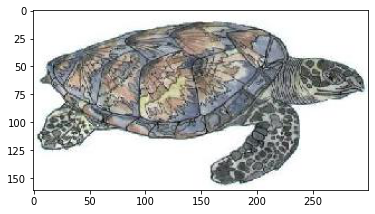

In [ ]:
plt.imshow(mpimg.imread(filenames[random_index]))

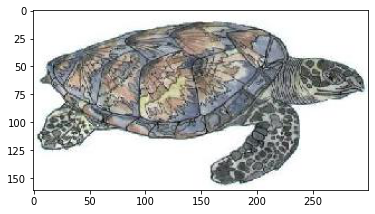

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]))

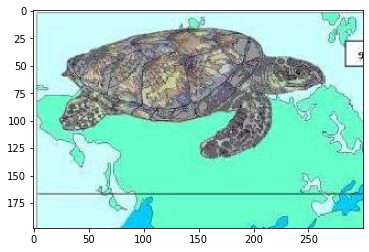

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]))

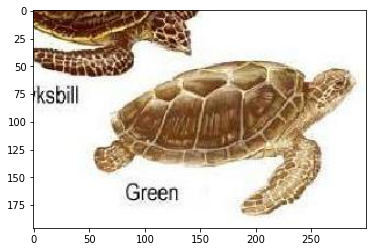

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][2]]))

In [ ]:
for i in range(5):
    print(distances[0][i])

4.2146848e-08
0.61391467
0.6632041
0.6640254
0.6913976


In [ ]:
# Helper function to get the classname
def classname(str):
    return str.split('/')[-2]


# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]


# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 10))
    columns = 4
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + classname_filename(filenames[i]))
        else:
            ax.set_title("Similar Image\n" + classname_filename(filenames[i]) +
                         "\nDistance: " +
                         str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)



In [ ]:
for i in range(10):
    random_image_index = random.randint(0, 8000)
    distances, indices = neighbors.kneighbors(
        [feature_list[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + \
        [filenames[indices[0][i]] for i in range(1, 4)]
    plot_images(similar_image_paths, distances[0])

In [ ]:
# Calculating some stats
print("Median distance between all photos: ", np.median(distances))
print("Max distance between all photos: ", np.max(distances))
print("Median distance among most similar photos: ",
      np.median(distances[:, 2]))

Median distance between all photos:  0.5878322
Max distance between all photos:  0.5990474
Median distance among most similar photos:  0.5878322


### Calculating Accuracy of the Brute Force Model :

In [ ]:
# Helper function that calculates accuracy using the nearest neighbors brute force algorithm
def calculate_accuracy(feature_list):
    num_nearest_neighbors = 5
    correct_prediction = 0
    incorrect_prediction = 0
    neighbors = NearestNeighbors(n_neighbors=num_nearest_neighbors,
                                 algorithm='brute',
                                 metric='euclidean').fit(feature_list)
    start = time.time()
    for i in range(len(feature_list)):
        distances, indices = neighbors.kneighbors([feature_list[i]])
        for j in range(1, num_nearest_neighbors):
            if (classname(filenames[i]) == classname(
                    filenames[indices[0][j]])):
                correct_prediction += 1
            else:
                incorrect_prediction += 1
    end = time.time()
    accuracy = round(
        100.0 * correct_prediction /
        (1.0 * correct_prediction + incorrect_prediction), 2), end - start
    return accuracy

In [ ]:
print("Accuracy on original feature set : ",
      calculate_accuracy(feature_list[:]))

Accuracy on original feature set :  (87.0, 584.7853474617004)


## Visualizing Image Clusters with t-SNE:

Let’s step up the game by visualizing the entire dataset!

- To do this, we need to reduce the dimensions of the feature vectors because it’s not possible to plot a 2,048-dimension vector (the feature-length) in two dimensions (the paper).
- The t-distributed stochastic neighbor embedding (t-SNE) algorithm reduces the high-dimensional feature vector to 2D, providing a bird’s-eye view of the dataset, which is helpful in recognizing clusters and nearby images.
- t-SNE is difficult to scale to large datasets, so it is a good idea to reduce the dimensionality using Principal Component Analysis (PCA) and then call t-SNE:

In [ ]:
# Perform PCA over the features
num_feature_dimensions=150 # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

Time taken to search similar images for one image using PCA:

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list_compressed)
distances, indices = neighbors.kneighbors([feature_list_compressed[random_index]])
%timeit distances, indices = neighbors.kneighbors([feature_list_compressed[random_index]])

The slowest run took 6.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 5.33 ms per loop


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.004s...
[t-SNE] Computed neighbors for 4000 samples in 0.645s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.147388
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.091812
[t-SNE] KL divergence after 1000 iterations: 1.111347


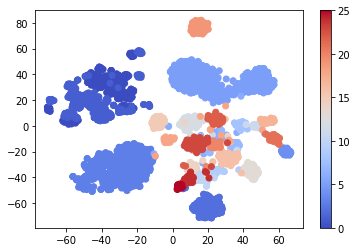

In [ ]:
# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:4000]
selected_class_ids = class_ids[:4000]
selected_filenames = filenames[:4000]
tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)
# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1],c=selected_class_ids, cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data


def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    if axis is None:
        axis = plt.gca()
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        image.thumbnail((100, 100), Image.ANTIALIAS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0),
                                  xycoords='data',
                                  frameon=False)
        axis.add_artist(anno_box)
    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()

In [ ]:
def show_tsne(x, y, selected_filenames):
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x, y, selected_filenames, zoom=0.3, axis=axis)
    plt.show()

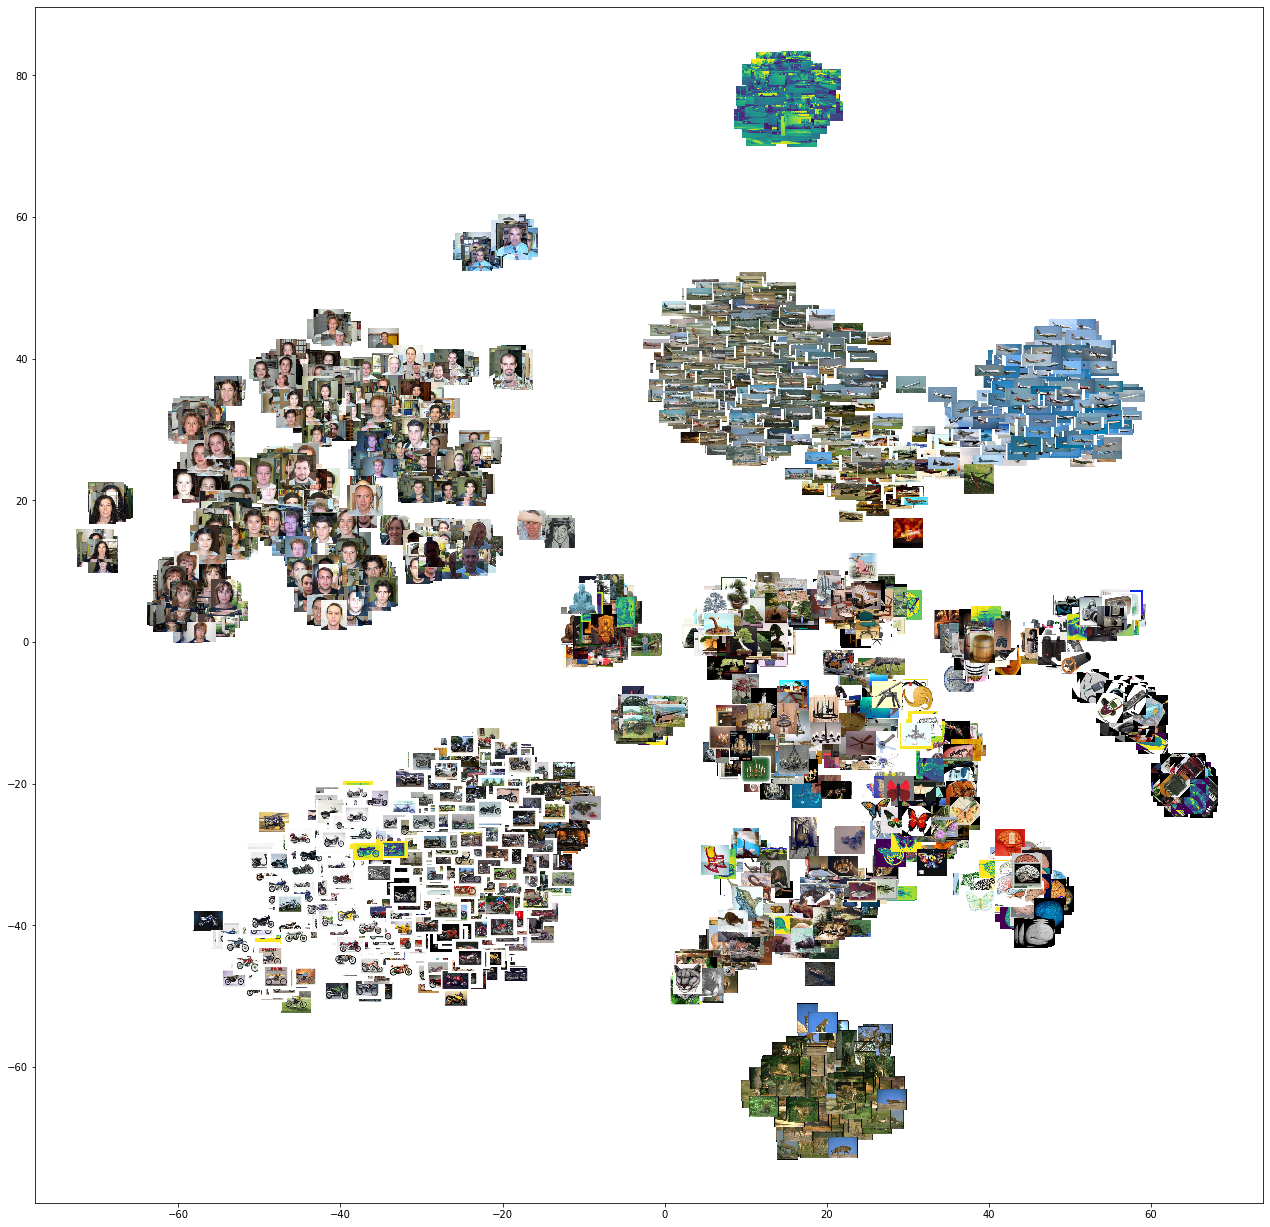

In [ ]:
show_tsne(tsne_results[:, 0], tsne_results[:, 1], selected_filenames)


Neat! There is a clearly demarcated cluster of human faces, flowers, vintage cars, ships, bikes, and a somewhat spread-out cluster of land and marine animals.

### Improving the Speed of Similarity Search:

- There are several opportunities to improve the speed of the similarity search step.
- For similarity search, we can make use of two strategies: either reduce the feature-length, or use a better algorithm to search among the features.
- Let’s examine each of these strategies individually.

#### Length of Feature Vectors:

- Ideally, we would expect that the smaller the amount of data in which to search, the faster the search should be.
- Recall that the ResNet-50 model gives 2,048 features.
- With each feature being a 32-bit floating-point, each image is represented by an 8 KB feature vector. For a million images, that equates to nearly 8 GB.
- Imagine how slow it would be to search among 8 GB worth of features.
- To give us a better picture of our scenario, Below table gives the feature- lengths that we get from different models:




<img src= 'https://drive.google.com/uc?id=1dC744cDp5n_-jwWEX_WKDpFN9eczfi6x' width=500 height=200>

- As we can see, almost all the models generate a large number of features.

- Imagine how much faster the search would be if we could reduce to a mere 100 features (a whopping reduction of 10 to 20 times!) without compromising the quality of the results.

- Apart from just the size, this is an even bigger improvement for big data scenarios, for which the data can be loaded into RAM all at once instead of periodically loading parts of it, thus giving an even bigger speedup.

- PCA will help us make this happen.

- as you have seen above we have chosen 100 dimensions for PCA from the original 2048

### Why did we pick 150 dimensions from the original 2,048?

 Why not 200? PCA is representing our original feature vector but in reduced dimensions.

- Each new dimension has diminishing returns in representing the original vector (i.e., the new dimension might not explain the data much) and takes up valuable space.

- The number of dimensions in PCA is an important parameter that we can tune to the problem at hand.

- One way to directly justify a good threshold is to find a good balance between the number of features and its effect on accuracy versus speed:

## Accuracy of Brute Force over the PCA compressed Caltech101 features


In [ ]:
pca_dimensions = [1, 2, 3, 4, 5, 10, 20, 50, 75, 100, 150, 200]
pca_accuracy = []
pca_time = []

for dimensions in pca_dimensions:
    pca = PCA(n_components=dimensions)
    pca.fit(feature_list)
    feature_list_compressed = pca.transform(feature_list[:])
    # Calculate accuracy over the compressed features
    accuracy, t = calculate_accuracy(feature_list_compressed[:])
    pca_time.append(t)
    pca_accuracy.append(accuracy)
    print("For PCA Dimensions = ", dimensions, ",\tAccuracy = ", accuracy, "%",
          ",\tTime = ", pca_time[-1])

For PCA Dimensions =  1 ,	Accuracy =  15.43 % ,	Time =  5.8796515464782715
For PCA Dimensions =  2 ,	Accuracy =  26.15 % ,	Time =  6.158180236816406
For PCA Dimensions =  3 ,	Accuracy =  32.4 % ,	Time =  7.299118995666504
For PCA Dimensions =  4 ,	Accuracy =  40.07 % ,	Time =  6.617396116256714
For PCA Dimensions =  5 ,	Accuracy =  45.93 % ,	Time =  6.806637763977051
For PCA Dimensions =  10 ,	Accuracy =  63.93 % ,	Time =  14.823916912078857
For PCA Dimensions =  20 ,	Accuracy =  77.81 % ,	Time =  13.174192667007446
For PCA Dimensions =  50 ,	Accuracy =  85.21 % ,	Time =  23.598203897476196
For PCA Dimensions =  75 ,	Accuracy =  86.38 % ,	Time =  40.408857345581055
For PCA Dimensions =  100 ,	Accuracy =  86.91 % ,	Time =  37.94637584686279
For PCA Dimensions =  150 ,	Accuracy =  87.03 % ,	Time =  51.85892105102539
For PCA Dimensions =  200 ,	Accuracy =  87.05 % ,	Time =  63.817588806152344


- As is visible stats, there is little improvement in accuracy after increasing beyond a feature-length of 150 dimensions.

- With almost 20 times fewer dimensions (150) than the original (2,048), this offers drastically higher speed and less time on almost any search algorithm, while achieving similar (and sometimes slightly better) accuracy.

- Hence, 150 would be an ideal feature-length for this dataset.
- This also means that the first 150 dimensions contain the most information about the dataset.

### **How to scale it to millions of images ?**

- Right now to find the similar images we are following the brute force approach
  - Although convenient to implement in two lines, it goes over each element and hence scales linearly with data size (number of items as well as the number of dimensions).
  - Having PCA take our feature vector from a length of 2,048 to 150 will not only yield a 20-times reduction in data size, but also result in an increase in speed of 20 times when using brute force. PCA does pay off!
 - Let’s assume similarity searching a small collection of 10,000 images, now represented with 100 feature-length vectors, takes approximately 1 ms.
 -  Even though this looks fast for 10,000 items, in a real production system with larger data, perhaps 10 million items, this will take more than a second to search.
 - Our system might not be able to fulfill more than one query per second per CPU core.
 - If you receive 100 requests per second from users, even running on multiple CPU cores of the machine (and loading the search index per thread), you would need multiple machines to be able to serve the traffic.
 - In other words, an inefficient algorithm means money, lots of money, spent on hardware.
 - Brute force is our baseline for every comparison.

- But Iterating over millions of images to find the most similar ones doesn't scale very well if we need to process all of the images every time we want to find a similar one.

- To optimize this process, we need to build some kind of index and find a way to iterate over it more efficiently.

- As in most algorithmic approaches, brute force is the slowest approach. Now that we have our baseline set, we will explore approximate nearest-neighbor algorithms.

### Scaling Similarity Search with Approximate Nearest Neighbors

  - Instead of guaranteeing the correct result as with the brute-force approach, approximation algorithms generally get the correct result because they are well, approximations.
  - Most of the algorithms offer some form of tuning to balance between correctness and speed.
  - It is possible to evaluate the quality of the results by comparing against the results of the brute-force baseline.

- Luckily Spotify, Google, and Facebook open-sourced their solution for exactly that problem.


- But there are also managed services if you don’t want to take care of the required infrastructure and scaling on your own.

  - Open Source Frameworks like [Facebook’s Faiss](https://https://github.com/facebookresearch/faiss) and [Spotify Annoy](https://https://github.com/spotify/annoy), [Googles ScaNN](https://https://github.com/google-research/google-research/tree/master/scann)
  - Services like [Google Vertex AI Matching Engine](https://https://cloud.google.com/vertex-ai/docs/matching-engine/overview), [IO Similarity Search](https://ioannotator.com/image-similarity-search), [Pinecone](https://https://www.pinecone.io/), [Milvus](https://https://milvus.io/docs/overview.md)

### PCA + Annoy:

- Annoy (Approximate Nearest Neighbors Oh Yeah) is a C++ library with Python bindings for searching nearest neighbors.
- Synonymous with speed, it was released by Spotify and is used in production to serve their music recommendations.

- To use annoy, install it using pip: pip3 install annoy

In [ ]:
!pip3 install Annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 646 kB 28.9 MB/s 
  Created wheel for Annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=394608 sha256=847ebda234dcd2bdd6c73398026399a0a412dc4583365e5959fd96250ca5759c
  Stored in directory: /root/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
Successfully built Annoy


In [ ]:
from annoy import AnnoyIndex

First, we build a search index with two hyperparameters - the number of dimensions of the dataset, and the number of trees.

In [ ]:
# Time the indexing for Annoy
t = AnnoyIndex(150)  # Length of item vector that will be indexed
starttime = time.time()
for i in range(num_images):
    feature = feature_list_compressed[i]
    t.add_item(i, feature)
endtime = time.time()
print(endtime - starttime)
t.build(40)  # 40 trees
t.save('data/caltech101index.ann')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  


0.3510735034942627


True

Annoy on one image:
Now let’s find out the time it takes to search the 5 nearest neighbors of one image.

In [ ]:
random_image_index = 1001

In [ ]:
u = AnnoyIndex(150)
%timeit u.get_nns_by_vector(feature_list_compressed[random_image_index], 5, include_distances=True)
indexes = u.get_nns_by_vector(feature_list_compressed[random_image_index],
                              5,
                              include_distances=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  """Entry point for launching an IPython kernel.


The slowest run took 100.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 19.9 µs per loop


- Now **THAT is blazing fast!** To put this in perspective, for such a modestly sized dataset, this can serve almost 15000 requests on a single CPU core.

- Considering most CPUs have multiple cores, it should be able to handle 100K+ requests on a single system. The best part is that it lets you share the same index in memory between multiple processes. Hence, the biggest index can be equivalent to the size of your overall RAM, making it possible to serve multiple requests on a single system.



Helper function to time the search for multiple images for Annoy.

Perform the search for the same image multiple times to get an average value.

In [ ]:
def calculate_annoy_time():
    for i in range(0, 100):
        indexes = u.get_nns_by_vector(feature_list_compressed[random_image_index],
                                      5,
                                      include_distances=True)

Annoy on a set of images:

Time the search for multiple images for Annoy.

In [ ]:
%time calculate_annoy_time()

CPU times: user 5.42 ms, sys: 0 ns, total: 5.42 ms
Wall time: 4.56 ms


## Conclusion:

Feature extraction using RESNET50 on Caltech101 dataset:
- Bruteforce + 2048 length feature:59.8ms
- Bruteforce + PCA(150):5.3ms
- Annoy + PCA(150):19us

## Exercise:

Try to extract features from other pretrained models such as Inception net, Vgg19 etc and compare the time and accuracy of your models.
